# House Loan Data Analysis

This data is showing people who got house loans and their features. We are going to examine the data and try to build a model that predicts the chance of default for future loans.

In [10]:
#Importing the dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
#Importing the data
df=pd.read_csv("loan_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Looking at the shape of data
df.shape

(307511, 122)

We have a lot of features. Let's examine the data types

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

We have a lot of object data types. We have to deal with them later.

Now we can observe if there are any null values.

In [14]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

There are some missing data. Let's look at the percentage of the missing rows in all the rows.

In [15]:
for item in range(0,len(df.columns)):
  percentage=round(100*df[df.columns[item]].isna().sum()/len(df[df.columns[item]]),2)
  if percentage != 0.0:
    print(f"Column {df.columns[item]} has missing data of %{percentage}")

Column AMT_GOODS_PRICE has missing data of %0.09
Column NAME_TYPE_SUITE has missing data of %0.42
Column OWN_CAR_AGE has missing data of %65.99
Column OCCUPATION_TYPE has missing data of %31.35
Column EXT_SOURCE_1 has missing data of %56.38
Column EXT_SOURCE_2 has missing data of %0.21
Column EXT_SOURCE_3 has missing data of %19.83
Column APARTMENTS_AVG has missing data of %50.75
Column BASEMENTAREA_AVG has missing data of %58.52
Column YEARS_BEGINEXPLUATATION_AVG has missing data of %48.78
Column YEARS_BUILD_AVG has missing data of %66.5
Column COMMONAREA_AVG has missing data of %69.87
Column ELEVATORS_AVG has missing data of %53.3
Column ENTRANCES_AVG has missing data of %50.35
Column FLOORSMAX_AVG has missing data of %49.76
Column FLOORSMIN_AVG has missing data of %67.85
Column LANDAREA_AVG has missing data of %59.38
Column LIVINGAPARTMENTS_AVG has missing data of %68.35
Column LIVINGAREA_AVG has missing data of %50.19
Column NONLIVINGAPARTMENTS_AVG has missing data of %69.43
Column

We are going to drop the columns that have missing data higher than 25%, and fill the remaining with columns averages. For the categorical variables with missing value less than 25%, we are going to use the most frequent category when filling.

In [16]:
x=len(df.columns)
df_to_remove=[]
for item in range(0,len(df.columns)):
  percentage=round(100*df[df.columns[item]].isna().sum()/len(df[df.columns[item]]),2)
  if percentage > 25:
    df_to_remove.append(df.columns[item])
  else:
    try:
      df[df.columns[item]] = df[df.columns[item]].fillna((df[df.columns[item]].mean()))
    except:
      df[df.columns[item]] = df[df.columns[item]].fillna(df[df.columns[item]].value_counts().index[0])
for item in df_to_remove:
  df.drop(columns=[item],inplace=True)

In [17]:
#We can also drop the "SK_ID_CURR" column that tells us nothing.

df.drop(columns=["SK_ID_CURR"],inplace=True)

In [18]:
print(f"Missing values: {df.isna().sum().sum()}")
print(f"New shape is {df.shape}")

Missing values: 0
New shape is (307511, 71)


Now we have no missing values.

In [19]:
#Looking at the remaining columns after dropping the columns that have lots of missing values
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SO

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.573909,14493.454517,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538396.207429,369279.426396,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


## Correlation Analysis

Let's generate a heatmap showing us the correlation between the variables

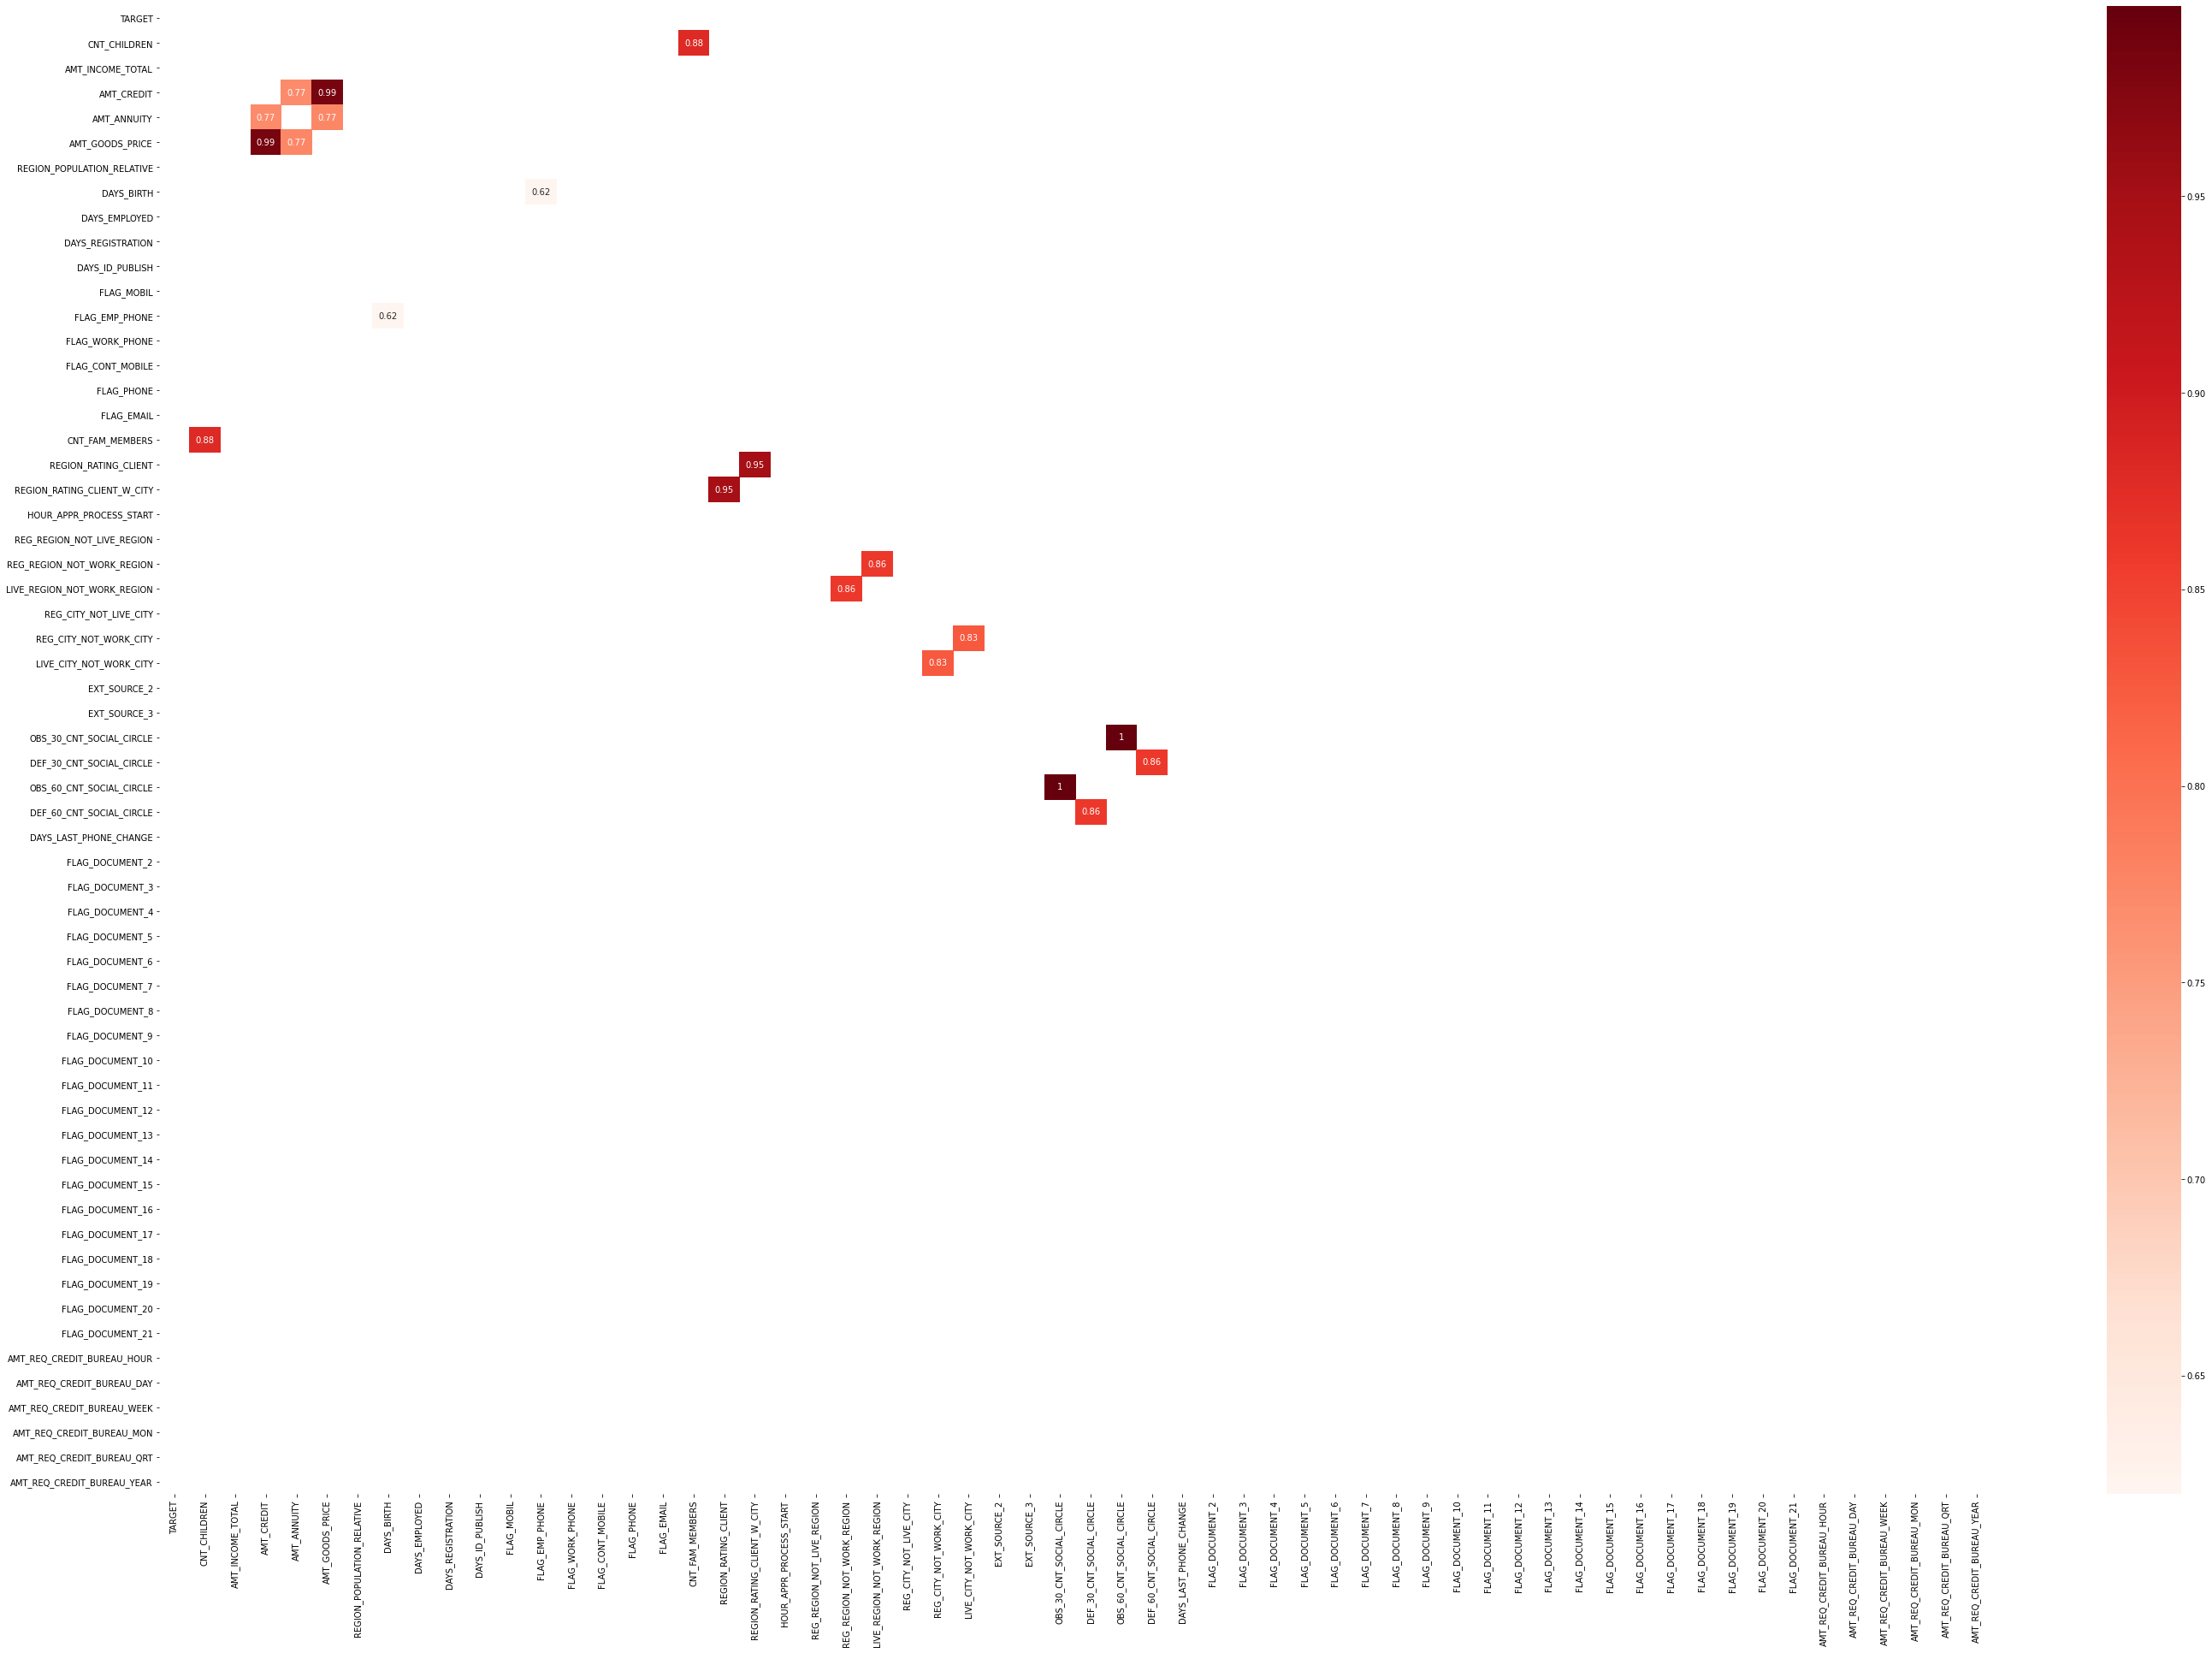

In [21]:
#Positive Correlations

corr = df.corr()
kot = corr[corr>=.6]
kot=kot[corr<1]
plt.figure(figsize=(48,32))
sns.heatmap(kot, cmap="Reds",annot=True);

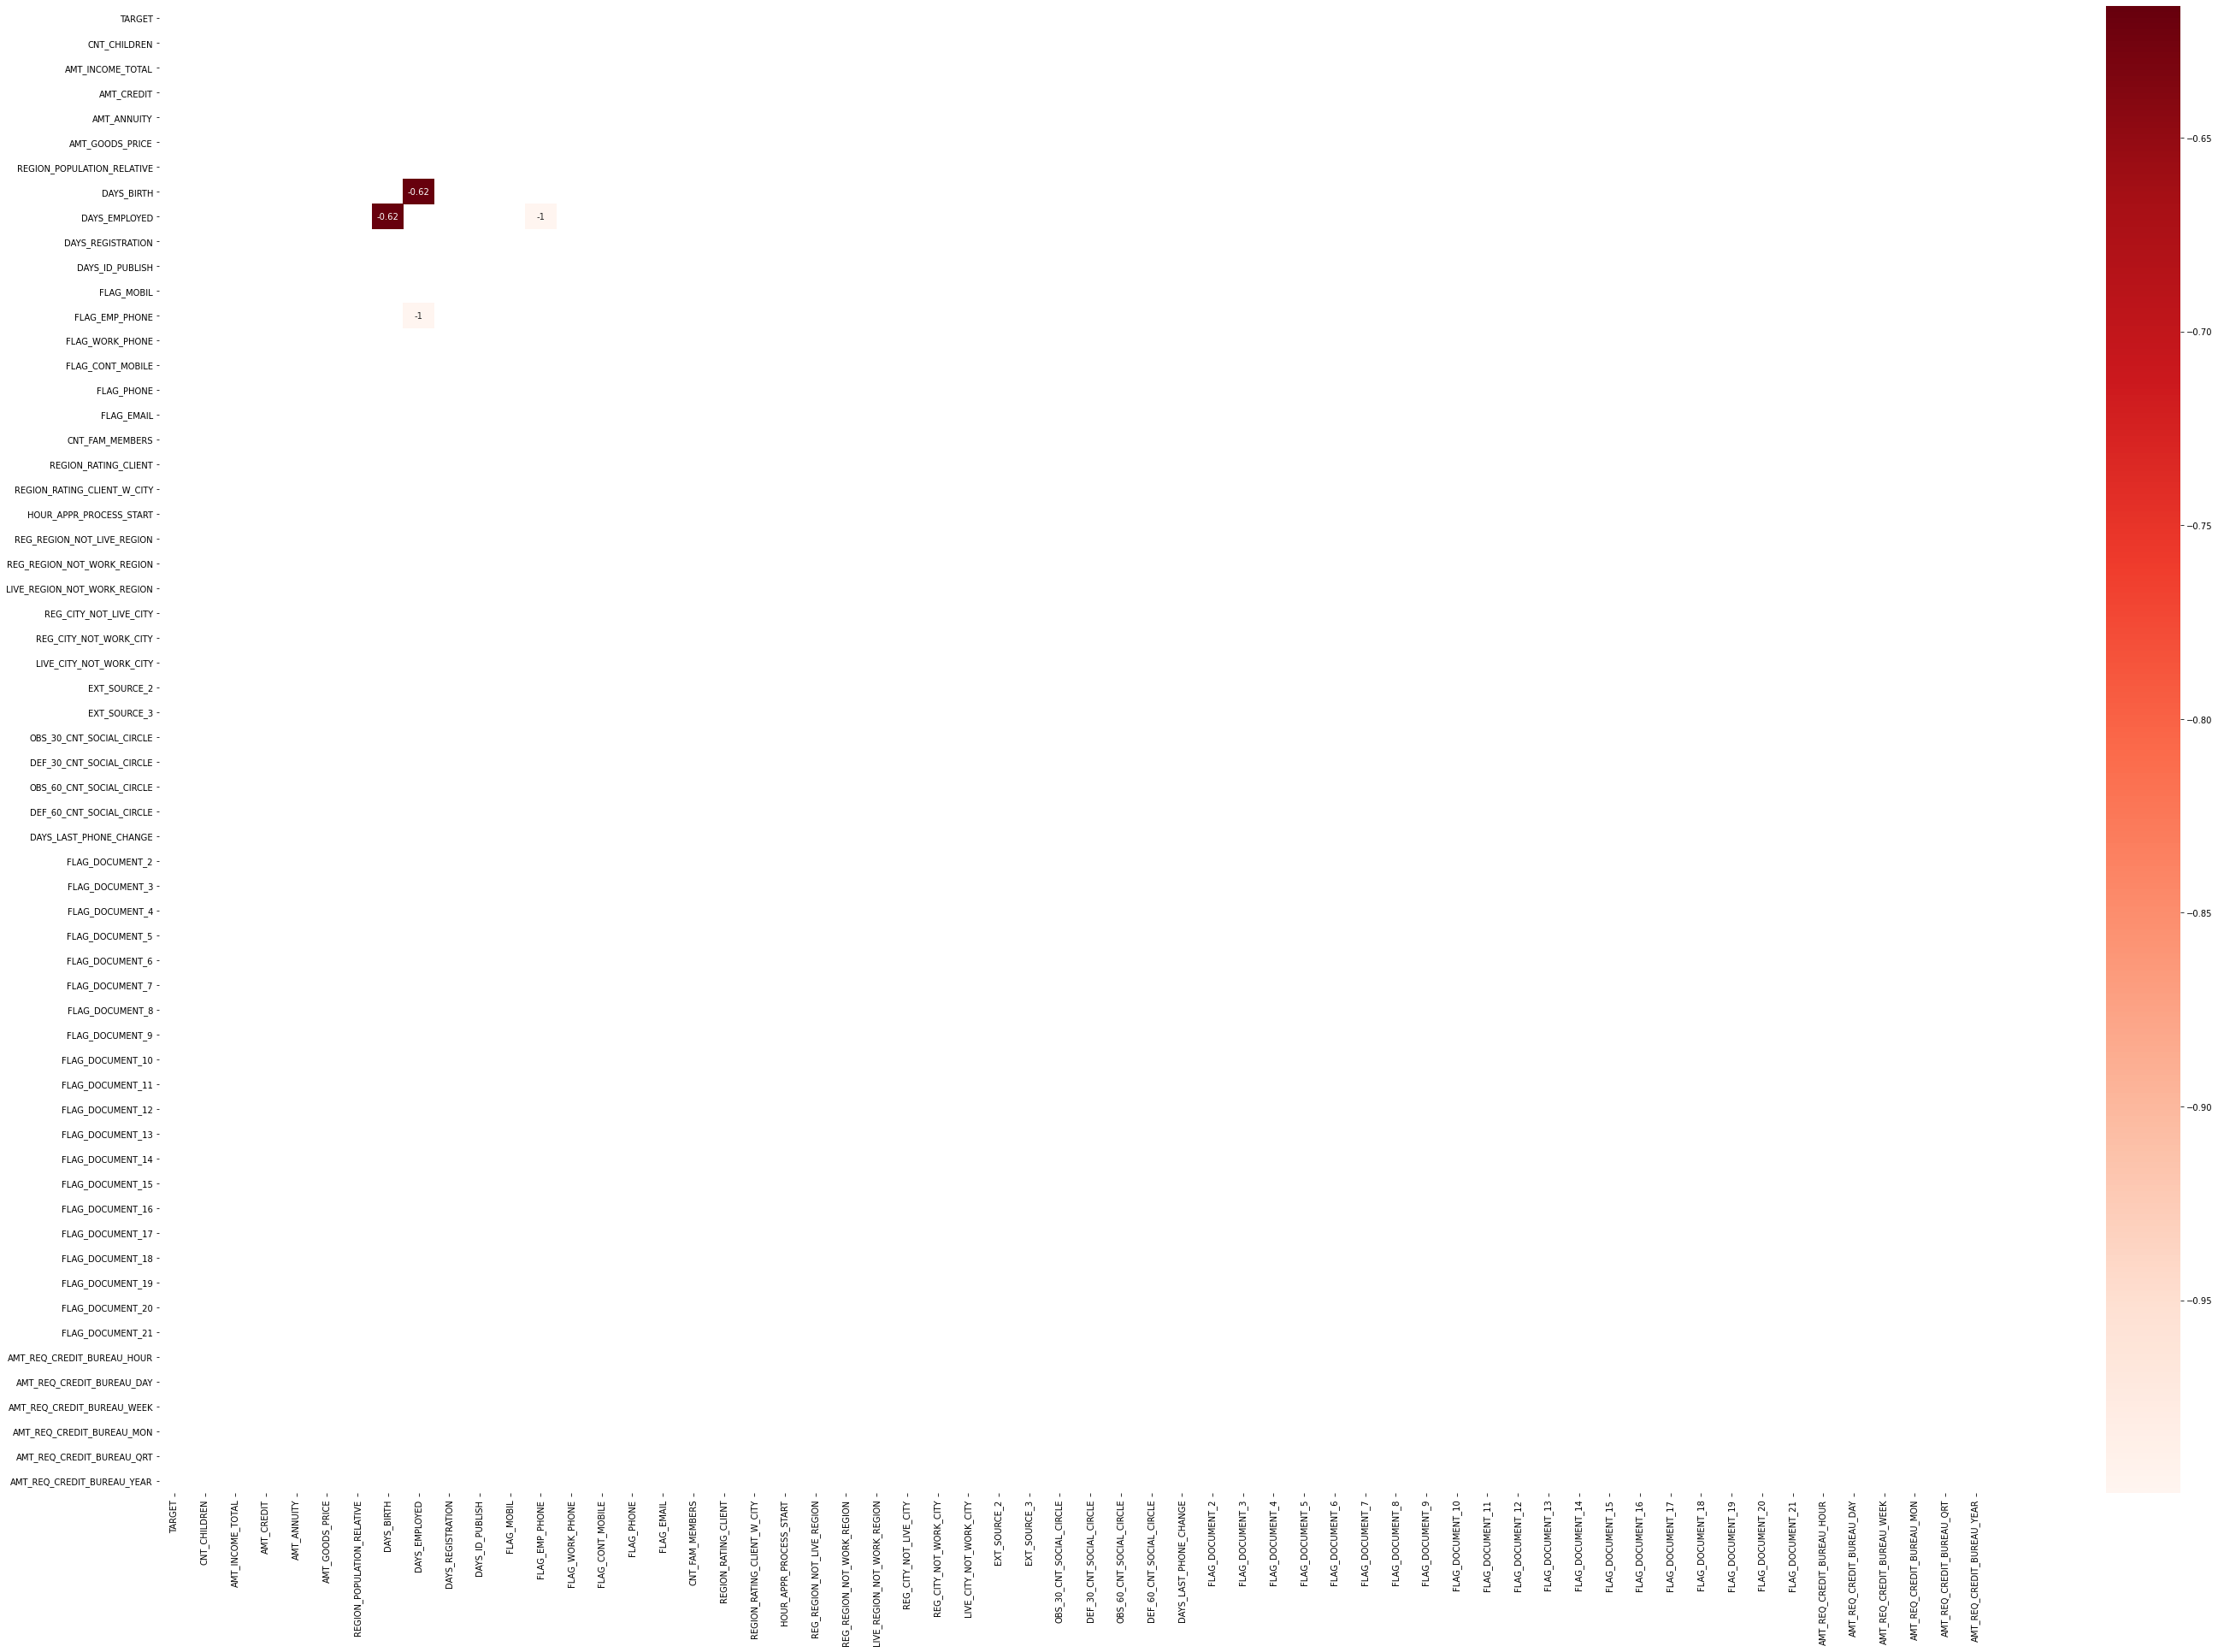

In [22]:
#Negative Correlations

corr = df.corr()
kot = corr[corr<=-.6]
plt.figure(figsize=(48,32))
sns.heatmap(kot, cmap="Reds",annot=True);

**Correlations**

1. **CNT_FAM_MEMBERS** and **CNT_CHILDREN** have a correlation of **88%**. We are going to remove **CNT_CHILDREN**

2. **AMT_CREDIT** and **AMT_ANNUITY** have a correlation of **77%**. We are going to remove **AMT_CREDIT**.

3. **AMT_GOODS PRICE** and **AMT_CREDIT** have a correlation of **99%**. We are already going to remove **AMT_CREDIT**.

4. **FLAG_EMP_PHONE** and **DAYS_BIRTH** have a correlation of **62%**. We are going to remove **FLAG_EMP_PHONE**.

5. **AMT_GOODS PRICE** and **AMT_ANNUITY** have a correlation of **77%**. We are going to remove **AMT_ANNUITY**.

6. **REGION_RATING_CLIENT_W_CITY** and **REGION_RATING_CLIENT** have a correlation of **95%**. We are going to remove **REGION_RATING_CLIENT_W_CITY**

7. **LIVE_REGION_NOT_WORK_REGION** and **REG_REGION_NOT_WORK_REGION** have a correlation of **86%**. We are going to remove **LIVE_REGION_NOT_WORK_REGION**.

8. **LIVE_CITY_NOT_WORK_CITY** and **REG_CITY_NOT_WORK_CITY** have a correlation of **83%**. We are going to remove **LIVE_CITY_NOT_WORK_CITY**.

9. **OBS_60_CNT_SOCIAL_CIRCLE** and **OBS_30_CNT_SOCIAL_CIRCLE** have a correlation of **100%**. We are going to remove **OBS_60_CNT_SOCIAL_CIRCLE**.

10. **DEF_30_CNT_SOCIAL_CIRCLE** and **DEF_60_CNT_SOCIAL_CIRCLE** have a correlation of **86%**. We are going to remove **DEF_30_CNT_SOCIAL_CIRCLE**.

11. **DAYS_EMPLOYED** and **DAYS_BIRTH** have a correlation of **-62%**. We are going to remove **DAYS_BIRTH**

12. **FLAG_EMP_PHONE** and **DAYS_EMPLOYED** have a correlation of **-100%**. We are already going to remove **FLAG_EMP_PHONE**.

In [23]:
df.drop(columns=["CNT_CHILDREN",
"AMT_CREDIT",
"AMT_ANNUITY",
"REGION_RATING_CLIENT_W_CITY",
"LIVE_REGION_NOT_WORK_REGION",
"LIVE_CITY_NOT_WORK_CITY",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"DAYS_BIRTH",
"FLAG_EMP_PHONE"],inplace=True)

Now we are going to check if the target value has an imbalance.

In [27]:
val=df.TARGET.value_counts()
print(val)

0    282686
1     24825
Name: TARGET, dtype: int64


In [33]:
print(f"People who defaulted on their loan has a percentage of {100*round(float(val[0])/len(df),2)}% of all data.")
print(f"People who did not default on their loan has a percentage of {100*round(float(val[1])/len(df),2)}% of all data.")

People who defaulted on their loan has a percentage of 92.0% of all data.
People who did not default on their loan has a percentage of 8.0% of all data.



Since there is an imbalance in the dataset, those who have stroke cannot be classified well. One way to overcome this issue is to oversample the examples in the minority class, in this case, those with stroke. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model. The most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling Technique, or **SMOTE** for short. This is what we are going to do later in the project.

Now, we are going to convert the catergorical variables into numerical ones using pd.get_dummies method.

In [34]:
object_variables=["NAME_CONTRACT_TYPE",
"CODE_GENDER",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"NAME_TYPE_SUITE",
"NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"WEEKDAY_APPR_PROCESS_START",
"ORGANIZATION_TYPE"]

for item in object_variables:
  dummies  = pd.get_dummies(df[item])
  df = pd.concat([df,dummies],axis='columns')
  df.drop([item],axis='columns',inplace=True)
df

,TARGET,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,...,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,XNA
0,1,202500.0,351000.0,0.018801,-637,-3648.0,-2120,1,0,1,1,0,1.0,2,10,0,0,0,0,0.262949,0.139376,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,270000.0,1129500.0,0.003541,-1188,-1186.0,-291,1,0,1,1,0,2.0,1,11,0,0,0,0,0.622246,0.510853,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,67500.0,135000.0,0.010032,-225,-4260.0,-2531,1,1,1,1,0,1.0,2,9,0,0,0,0,0.555912,0.729567,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,135000.0,297000.0,0.008019,-3039,-9833.0,-2437,1,0,1,0,0,2.0,2,17,0,0,0,0,0.650442,0.510853,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,121500.0,513000.0,0.028663,-3038,-4311.0,-3458,1,0,1,0,0,1.0,2,11,0,0,0,1,0.322738,0.510853,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,225000.0,0.032561,-236,-8456.0,-1982,1,0,1,0,0,1.0,1,15,0,0,0,0,0.681632,0.510853,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,72000.0,225000.0,0.025164,365243,-4388.0,-4090,1,0,1,1,0,1.0,2,8,0,0,0,0,0.115992,0.510853,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
307508,0,153000.0,585000.0,0.005002,-7921,-6737.0,-5150,1,0,1,0,1,1.0,3,9,0,0,0,1,0.535722,0.218859,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,1,171000.0,319500.0,0.005313,-4786,-2562.0,-931,1,0,1,0,0,2.0,2,9,0,0,1,1,0.514163,0.661024,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we are going to build our model. We are going to use artificial neural networks.

In [35]:
#Specifying dependent and independent variables
X=df.drop(columns=["TARGET"])
y=df["TARGET"]

In [37]:
#Oversampling the examples with SMOTE technique.

from collections import Counter
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42,sampling_strategy={1:280000})
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 282686, 1: 280000})


In [38]:
#Splitting the data as test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_res,
                                                    y_res,
                                                    test_size=0.20,
                                                    random_state=42)

In [39]:
#Scaling our independent variables  with the help of StandardScaler
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [40]:
#Building our neural network

ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
14068/14068 [==============================] - 16s 1ms/step - loss: 0.5626 - accuracy: 0.7095
Epoch 2/100
14068/14068 [==============================] - 14s 1ms/step - loss: 0.4598 - accuracy: 0.7716
Epoch 3/100
14068/14068 [==============================] - 14s 1ms/step - loss: 0.4139 - accuracy: 0.8003
Epoch 4/100
14068/14068 [==============================] - 14s 1ms/step - loss: 0.4009 - accuracy: 0.8072
Epoch 5/100
14068/14068 [==============================] - 14s 1ms/step - loss: 0.3937 - accuracy: 0.8107
Epoch 6/100
14068/14068 [==============================] - 14s 1ms/step - loss: 0.3889 - accuracy: 0.8133
Epoch 7/100
14068/14068 [==============================] - 14s 1ms/step - loss: 0.3857 - accuracy: 0.8149
Epoch 8/100
14068/14068 [==============================] - 15s 1ms/step - loss: 0.3829 - accuracy: 0.8160
Epoch 9/100
14068/14068 [==============================] - 14s 1ms/step - loss: 0.3808 - accuracy: 0.8162
Epoch 10/100
14068/14068 [====================

In [42]:
#Now we are going to take a look at the performance metrics, such as confusion matrix and accuracy score.

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[53524  3116]
 [13636 42262]]


0.8511436137127015

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     56640
           1       0.93      0.76      0.83     55898

    accuracy                           0.85    112538
   macro avg       0.86      0.85      0.85    112538
weighted avg       0.86      0.85      0.85    112538



We have a very high accuracy.